In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer

from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Load simulator
local_simulator = BasicAer.get_backend('qasm_simulator')

# Introduction

<img src="classical_gates.png" />

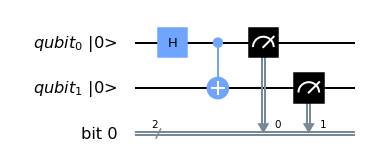

In [4]:
qr = QuantumRegister(2, 'qubit')
cr = ClassicalRegister(2, name="bit")
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw('mpl', initial_state=True)

In [5]:
job = execute(circuit, backend=local_simulator)
job.result().get_counts()

{'00': 505, '11': 519}

# Deutsch Algorithm

<table>
<tbody>
<tr>
<td colspan="2"><img src="deutsch_problem.png" /></td>
</tr>
<tr>
<td><img src="classic_oracle.png" /></td>
<td><img src="quantum_oracle.png" /></td>
</tr>
</tbody>
</table>

## Oracle 1: Constant zero

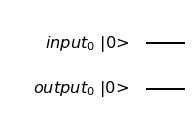

In [6]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
constant0 = QuantumCircuit(input, output, name='oracle')
oracle0 = constant0.to_instruction()
constant0.draw('mpl', initial_state=True)

## Oracle 2: Constant one

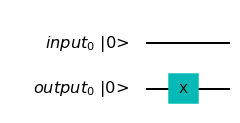

In [7]:
input = QuantumRegister(1, name='input')
temp = QuantumRegister(1, name='output')
constant1 = QuantumCircuit(input, temp, name='oracle')
constant1.x(temp)
oracle1 = constant1.to_instruction()
constant1.draw('mpl', initial_state=True)

## Oracle 3: Identity

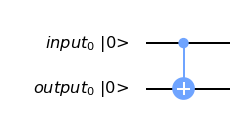

In [8]:
input = QuantumRegister(1, name='input')
temp = QuantumRegister(1, name='output')
identity = QuantumCircuit(input, temp, name='oracle')
identity.cx(input, temp)
oracle2 = identity.to_instruction()
identity.draw('mpl', initial_state=True)

## Oracle 4: Invert

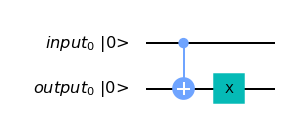

In [9]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
invert = QuantumCircuit(input, output, name='oracle')
invert.cx(input, output)
invert.x(output)
oracle3 = identity.to_instruction()
invert.draw('mpl', initial_state=True)

## Run an oracle

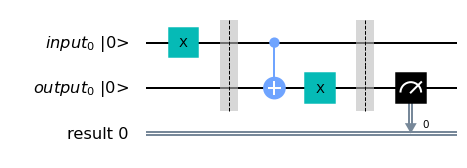

In [11]:
result = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(input, output, result)
circuit.x(input) # <- set input to 1
circuit.barrier()
circuit += invert # identity
circuit.barrier()
circuit.measure(output, result)
circuit.draw('mpl', initial_state=True)

In [12]:
execute(circuit, backend=local_simulator).result().get_counts()

{'0': 1024}

## Running Deutsch's Algorithm

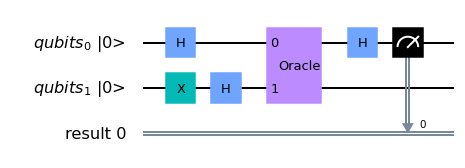

In [14]:
qr = QuantumRegister(2, name='qubits')
cr = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.append(oracle2, [qr[0], qr[1]])
circuit.h(qr[0])
circuit.measure(qr[0], cr[0]);
circuit.draw('mpl', initial_state=True)

In [15]:
counts = execute(circuit, backend=local_simulator, shots=1).result().get_counts()
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)
print(counts)

{'BALANCED': 1, 'CONSTANT': None}


# Real device!

In [16]:
import qiskit.tools.jupyter
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [17]:
provider = IBMQ.load_account()
least_busy_device = least_busy(provider.backends(simulator=False, filters=lambda b: b.configuration().n_qubits >= 2))
least_busy_device

/Users/lucianobello/talks/devnation/venv/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
job = execute(circuit, backend=least_busy_device, shots=1000)

In [20]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [76]:
counts = job.result().get_counts()
print(counts)

{'0': 37, '1': 963}


In [77]:
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)
print(counts)

{'BALANCED': 963, 'CONSTANT': 37}
